In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen= ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(
    r'/content/drive/MyDrive/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse'
)

x_test=test_datagen.flow_from_directory(
    r'/content/drive/MyDrive/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse'
)

Found 1210 images belonging to 5 classes.
Found 1210 images belonging to 5 classes.


In [ ]:
print(x_train.class_indices)

print(x_test.class_indices)



{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}
{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [ ]:
from collections import Counter as c
c(x_train .labels)

Counter({2: 114, 3: 621, 4: 475})

In [ ]:
import numpy as np

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Fitting the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5347 - accuracy: 0.4394 - val_loss: 1.2535 - val_accuracy: 0.5445
Epoch 2/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.1773 - accuracy: 0.5808 - val_loss: 1.1283 - val_accuracy: 0.5983
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0302 - accuracy: 0.6365 - val_loss: 1.0501 - val_accuracy: 0.6269
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.9381 - accuracy: 0.6696 - val_loss: 0.9480 - val_accuracy: 0.6668
Epoch 5/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.8697 - accuracy: 0.6958 - val_loss: 0.9290 - val_accuracy: 0.6762
Epoch 6/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8083 - accuracy: 0.7173 - val_loss: 0.8973 - val_accuracy: 0.6915
Epoch 7/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.7693 - accuracy: 0.7280 - val_loss: 0.8785 -

In [ ]:
#Saving our model
model.save('nutrition.h5')

In [ ]:
#Prediciting our results
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('nutrition.h5')

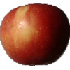

In [ ]:
img=image.load_img('/content/drive/MyDrive/1_100.jpg',target_size=(70,70))
img

In [ ]:
x= image.img_to_array(img)

In [ ]:
x = np.expand_dims(x, axis=0)

In [ ]:
index=['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']
result=str(index[0])
result

'APPLES'